# Visualizing the Fair Haven Harbor and New Bedford Point Deployment

Please note that Fairhaven (fh) will be used to refer to the harbor, and New Bedford (nb) will be used to refer to the point.

In [19]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.image import NonUniformImage
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import seaborn as sns
from IPython.display import display
from descartes import PolygonPatch
from shapely.geometry import LineString
import shapefile
from scipy.optimize import curve_fit
import sensor_plotting as sp

%matplotlib inline
%pylab inline

pd.set_option('display.max_columns',None)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 32

Populating the interactive namespace from numpy and matplotlib


/home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
all_data = 'data/clean/all_interpolated.csv'
fh_data = 'data/clean/fh_interpolated.csv'
nb_data = 'data/clean/nb_interpolated.csv'

ctd_geo = 'data/clean/ctd_geo.csv'
gga_geo = 'data/clean/gga_geo.csv'
nit_geo = 'data/clean/nit_geo.csv'
op_geo = 'data/clean/op_geo.csv'
air_geo = 'data/clean/air_geo.csv'

In [21]:
all_df = pd.read_table(all_data, delimiter=',', header=[0,1])
fh_df = pd.read_table(fh_data, delimiter=',', header=[0,1])
nb_df = pd.read_table(nb_data, delimiter=',', header=[0,1])

ctd_df = pd.read_table(ctd_geo, delimiter=',', header=[0,1])
gga_df = pd.read_table(gga_geo, delimiter=',', header=[0,1])
nit_df = pd.read_table(nit_geo, delimiter=',', header=[0,1])
air_df = pd.read_table(air_geo, delimiter=',', header=[0,1])
op_df = pd.read_table(op_geo, delimiter=',', header=[0,1])

## Visualizing [Lat,Lon,Dep,Prop] : Fairhaven

In [33]:
def viz_3d(x, y, z, c, label, title, vmin=None, vmax=None):
    if vmin==None:
        vmin = min(c)
    if vmax==None:
        vmax = max(c)
    
    m = plt.figure(figsize=(10,7))
    ax = m.add_subplot(111, projection='3d')
    cmap = plt.cm.viridis
    points = ax.scatter(x,y,z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = m.colorbar(points)
    cbar.set_label(label)
    m.suptitle(title, fontsize=18)
    ax.set_xlabel('Latitude', fontsize=18)
    ax.set_ylabel('Longitude', fontsize=18)
    ax.set_zlabel('Depth', fontsize=18)

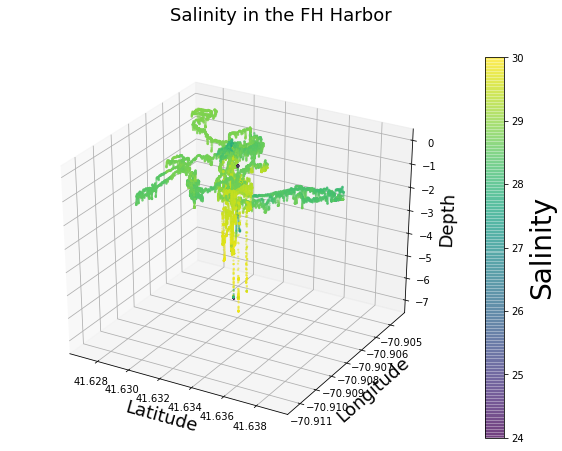

In [34]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity in the FH Harbor'

viz_3d(x, y, z, c, label, title, 24, 30)
plt.show()

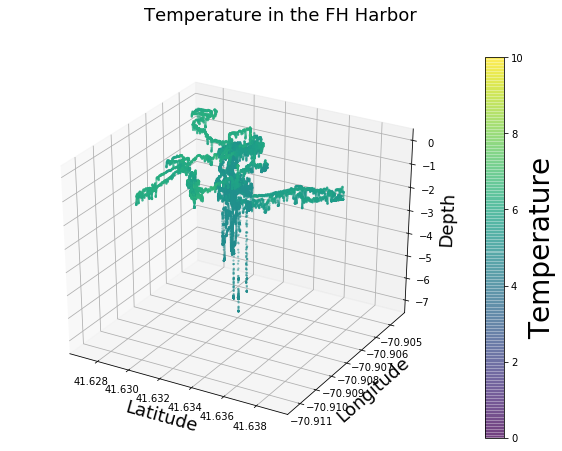

In [37]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature in the FH Harbor'

viz_3d(x, y, z, c, label, title, 0, 10)
plt.show()

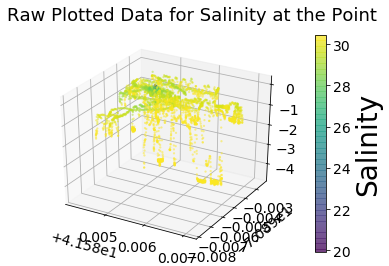

Unnamed: 0_level_0                      ctd                           \
  Unnamed: 0_level_1                     Time Conductivity Temperature   
0        Julian_Date                      NaN          NaN         NaN   
1      2458207.23101  2018-03-29 17:32:39.000    29.023490    5.098860   
2      2458207.23102  2018-03-29 17:32:40.000    29.031820    5.098037   
3      2458207.23103  2018-03-29 17:32:41.000    29.020673    5.106720   
4      2458207.23104  2018-03-29 17:32:42.000    29.019765    5.112787   

                                                               \
    Pressure Sea pressure     Depth   Salinity Speed of sound   
0        NaN          NaN       NaN        NaN            NaN   
1  10.900859     0.768359  0.762094  29.818095    1464.553465   
2  10.872893     0.740393  0.734355  29.828285    1464.562572   
3  10.877833     0.745333  0.739255  29.807889    1464.572457   
4  10.877216     0.744716  0.738643  29.801443    1464.589206   

                                                                          \
  Specific conductivity Density anomaly    Year Month   Day  Hour Minute   
0                   NaN             NaN     NaN   NaN   NaN   NaN    NaN   
1          46820.522124       23.563000  2018.0   3.0  29.0  17.0   32.0   
2          46835.146315       23.571019  2018.0   3.0  29.0  17.0   32.0   
3          46804.641052       23.553996  2018.0   3.0  29.0  17.0   32.0   
4          46794.432148       23.548259  2018.0   3.0  29.0  17.0   32.0   

                          gga                                            \
  Second Seconds_Elapsed Time    Year Month   Day  Hour Minute   Second   
0    NaN             NaN  NaN     NaN   NaN   NaN   NaN    NaN      NaN   
1   39.0       2568759.0  NaN  2018.0   3.0  29.0  17.0   32.0  39.2875   
2   40.0       2568760.0  NaN  2018.0   3.0  29.0  17.0   32.0  40.2645   
3   41.0       2568761.0  NaN  2018.0   3.0  29.0  17.0   32.0  41.3386   
4   42.0       2568762.0  NaN  2018.0   3.0  29.0  17.0   32.0  42.2170   

                                                                         \
  Seconds_Elapsed   CH4_ppm   CO2_ppm CH4_ppm_adjusted CO2_ppm_adjusted   
0             NaN       NaN       NaN              NaN              NaN   
1    2.568759e+06  2.303780  381.6175         1.165081       111.597078   
2    2.568760e+06  2.305760  382.8025         1.168169       111.943609   
3    2.568761e+06  2.305084  383.4742         1.167115       112.140036   
4    2.568762e+06  2.305350  384.1760         1.167530       112.345265   

         nit                                                            \
        0.00    Year Month   Day  Hour Minute   Second Seconds_Elapsed   
0        NaN     NaN   NaN   NaN   NaN    NaN      NaN             NaN   
1  18.085455  2018.0   3.0  29.0  17.0   32.0  39.1848    2.568759e+06   
2  18.292727  2018.0   3.0  29.0  17.0   32.0  40.0344    2.568760e+06   
3  18.552000  2018.0   3.0  29.0  17.0   32.0  41.1144    2.568761e+06   
4  18.760000  2018.0   3.0  29.0  17.0   32.0  42.0360    2.568762e+06   

         op                                                               \
  posixtime model  SN O2Concentration AirSaturation Temperature CalPhase   
0       NaN   NaN NaN             NaN           NaN         NaN      NaN   
1       NaN   NaN NaN             NaN           NaN         NaN      NaN   
2       NaN   NaN NaN             NaN           NaN         NaN      NaN   
3       NaN   NaN NaN             NaN           NaN         NaN      NaN   
4       NaN   NaN NaN             NaN           NaN         NaN      NaN   

                                                   air               \
  TCPhase C1RPh C2RPh C1Amp C2Amp RawTemp          lat          lon   
0     NaN   NaN   NaN   NaN   NaN     NaN          NaN          NaN   
1     NaN   NaN   NaN   NaN   NaN     NaN  4135.176450  7053.632850   
2     NaN   NaN   NaN   NaN   NaN     NaN  4135.176625  7053.632675   
3     NaN   NaN   NaN   NaN   NaN  

In [5]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity at the Point'

map_c = plt.figure()
ax = map_c.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
points = ax.scatter(x, y, z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)#, vmin=20, vmax=30)
cbar = map_c.colorbar(points)
cbar.set_label(label)

map_c.suptitle('Raw Plotted Data for ' + title, fontsize=18)
plt.show()
nb_df.head(5)

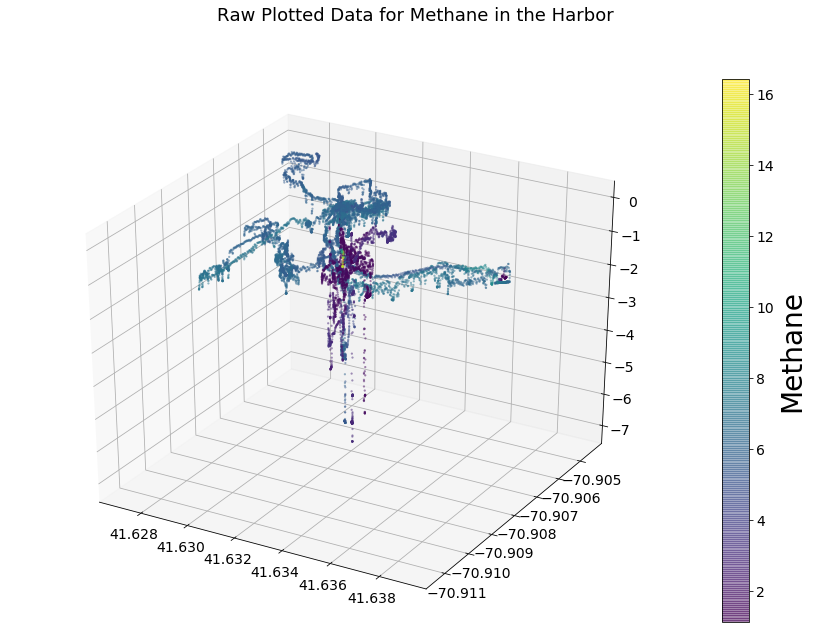

In [10]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Methane in the Harbor'

map_c = plt.figure(figsize=(15,10))
ax = map_c.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
points = ax.scatter(x, y, z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)#, vmin=20, vmax=30)
cbar = map_c.colorbar(points)
cbar.set_label(label)

map_c.suptitle('Raw Plotted Data for ' + title, fontsize=18)
plt.show()

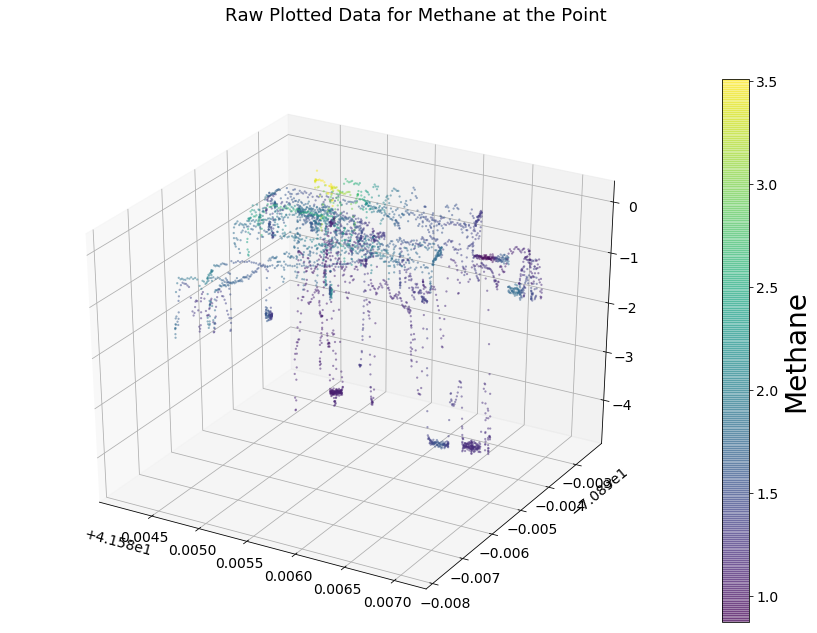

In [11]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Methane at the Point'

map_c = plt.figure(figsize=(15,10))
ax = map_c.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
points = ax.scatter(x, y, z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)#, vmin=20, vmax=30)
cbar = map_c.colorbar(points)
cbar.set_label(label)

map_c.suptitle('Raw Plotted Data for ' + title, fontsize=18)
plt.show()

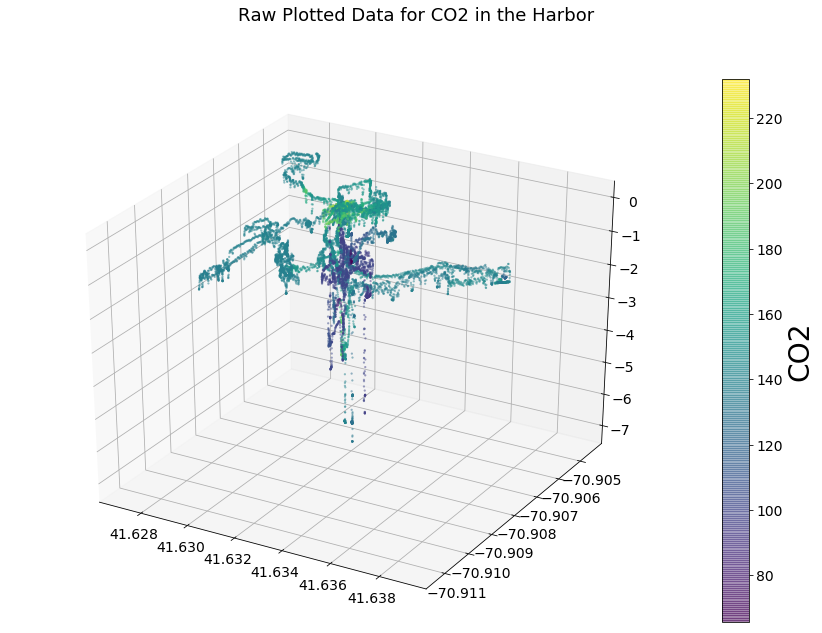

In [12]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 in the Harbor'

map_c = plt.figure(figsize=(15,10))
ax = map_c.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
points = ax.scatter(x, y, z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)#, vmin=20, vmax=30)
cbar = map_c.colorbar(points)
cbar.set_label(label)

map_c.suptitle('Raw Plotted Data for ' + title, fontsize=18)
plt.show()

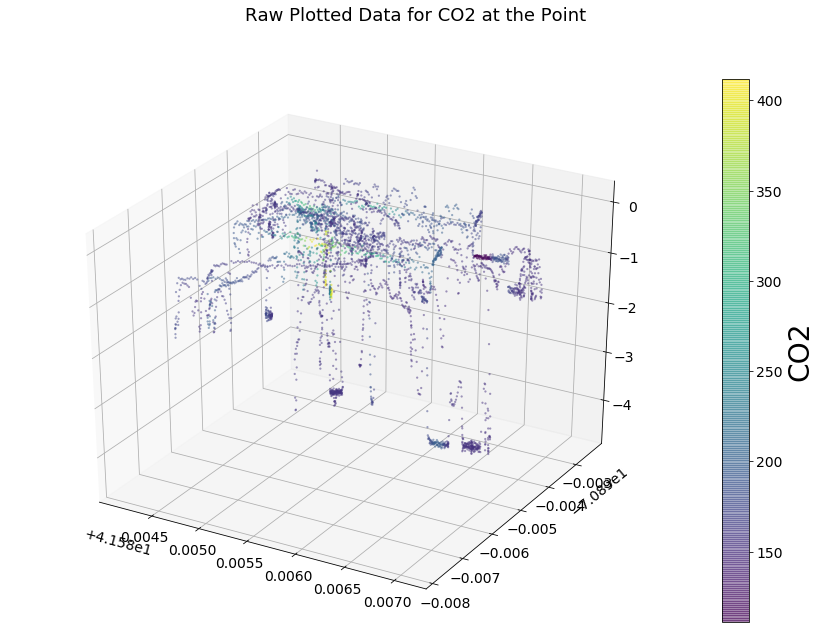

In [13]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 at the Point'

map_c = plt.figure(figsize=(15,10))
ax = map_c.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
points = ax.scatter(x, y, z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)#, vmin=20, vmax=30)
cbar = map_c.colorbar(points)
cbar.set_label(label)

map_c.suptitle('Raw Plotted Data for ' + title, fontsize=18)
plt.show()

Let's interpolate based upon the depth. We'll take a look at 1 meter slices first.

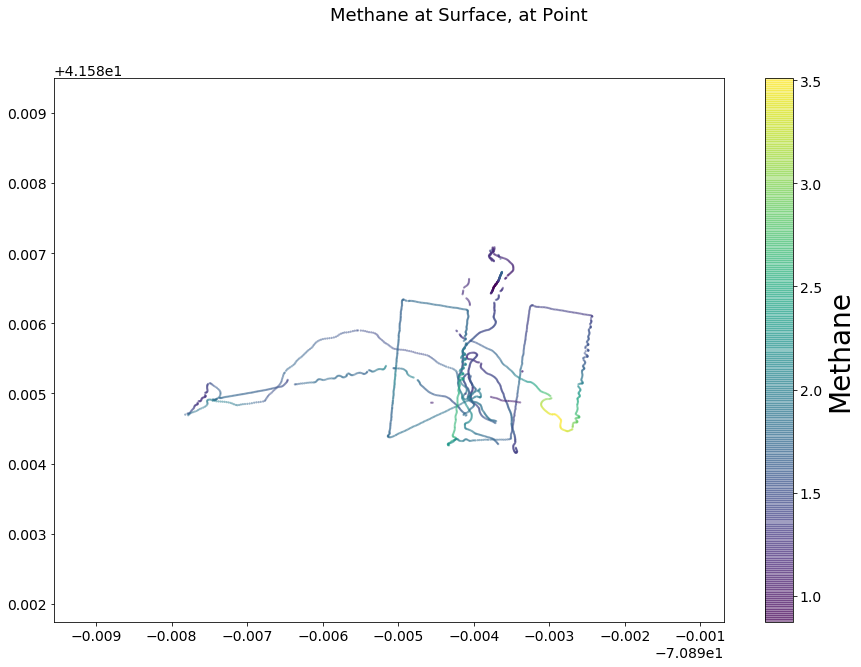

In [14]:
nb_1m = nb_df[nb_df['ctd']['Depth']<1]

x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']
c = nb_1m['gga']['CH4_ppm_adjusted']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Methane')

map_c.suptitle('Methane at Surface, at Point', fontsize=18)
plt.show()

In [25]:
from scipy.interpolate import griddata, Rbf
import scipy.optimize
from scipy.integrate import quad
from matplotlib.path import Path
from matplotlib.patches import PathPatch

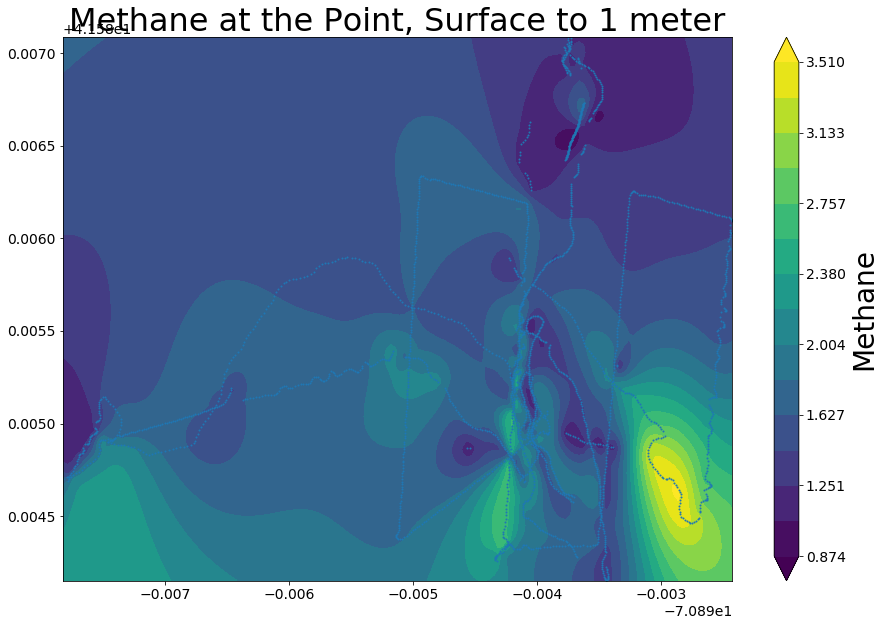

In [16]:
x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']
c = nb_1m['gga']['CH4_ppm_adjusted']

x_min = min(nb_1m['p']['Longitude'])
x_max = max(nb_1m['p']['Longitude'])
y_min = min(nb_1m['p']['Latitude'])
y_max = max(nb_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=2, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('Methane')
plt.title('Methane at the Point, Surface to 1 meter')

plt.show()

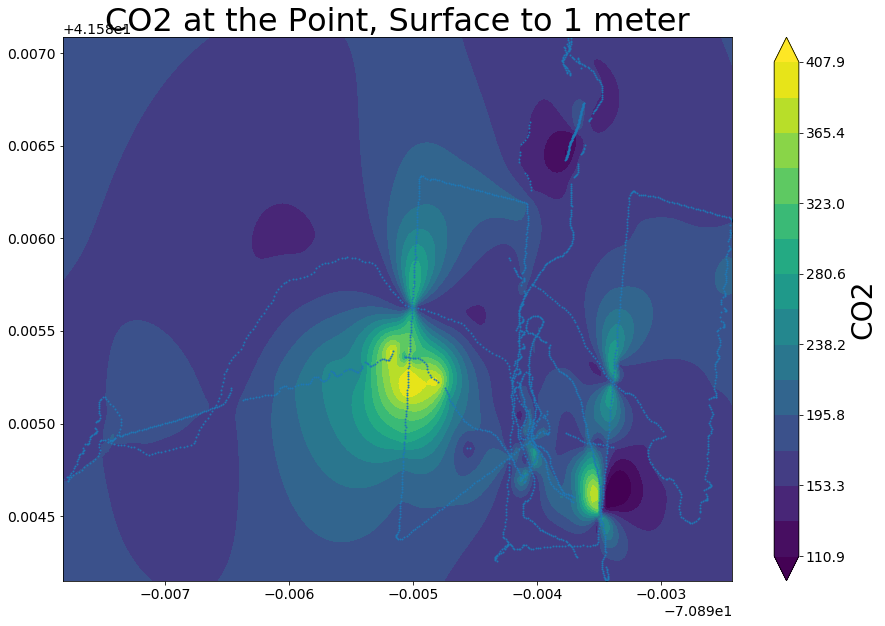

In [17]:
x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']
c = nb_1m['gga']['CO2_ppm_adjusted']

x_min = min(nb_1m['p']['Longitude'])
x_max = max(nb_1m['p']['Longitude'])
y_min = min(nb_1m['p']['Latitude'])
y_max = max(nb_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=2, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('CO2')
plt.title('CO2 at the Point, Surface to 1 meter')

plt.show()

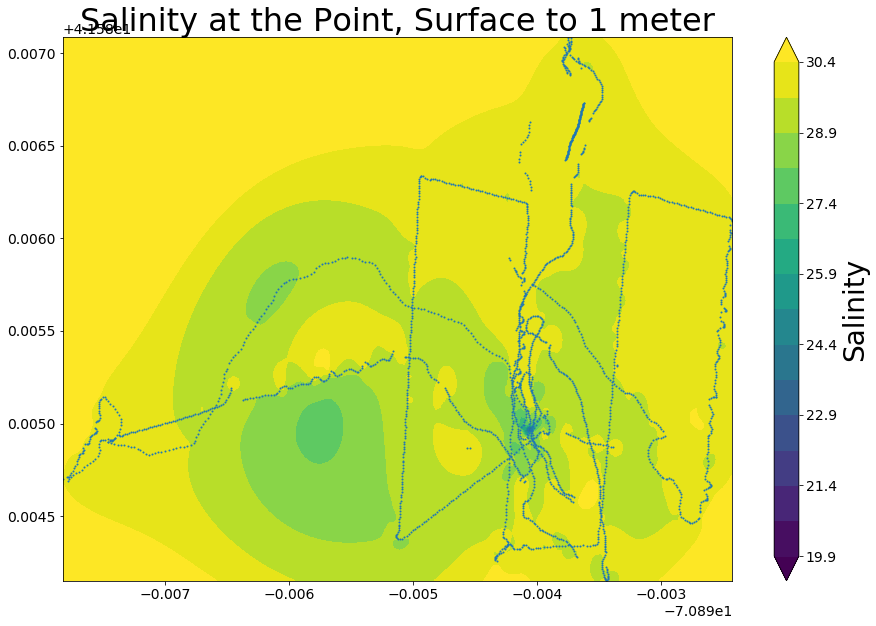

In [18]:
x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']
c = nb_1m['ctd']['Salinity']

x_min = min(nb_1m['p']['Longitude'])
x_max = max(nb_1m['p']['Longitude'])
y_min = min(nb_1m['p']['Latitude'])
y_max = max(nb_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=2, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('Salinity')
plt.title('Salinity at the Point, Surface to 1 meter')

plt.show()

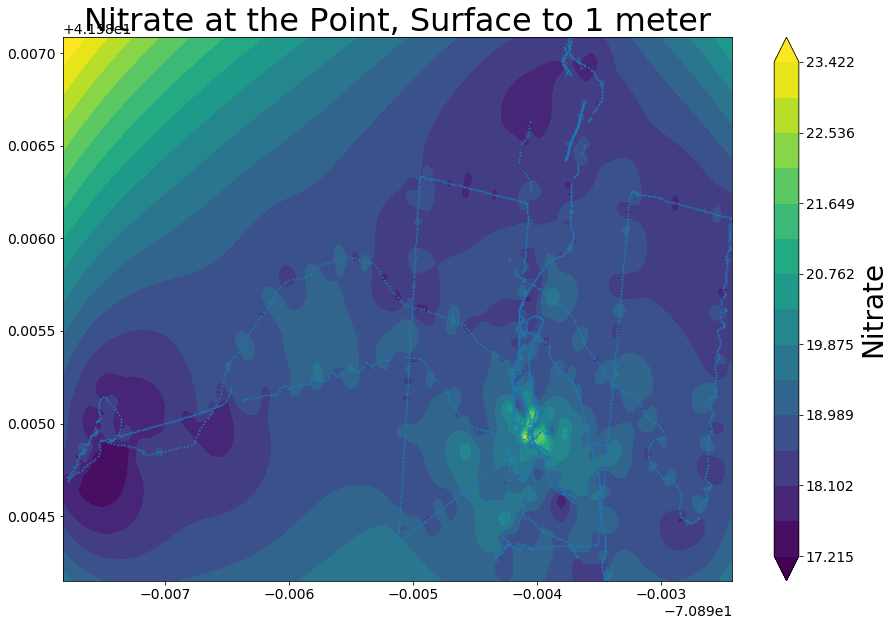

In [19]:
x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']
c = nb_1m['nit']['0.00']

x_min = min(nb_1m['p']['Longitude'])
x_max = max(nb_1m['p']['Longitude'])
y_min = min(nb_1m['p']['Latitude'])
y_max = max(nb_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=2, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('Nitrate')
plt.title('Nitrate at the Point, Surface to 1 meter')

plt.show()

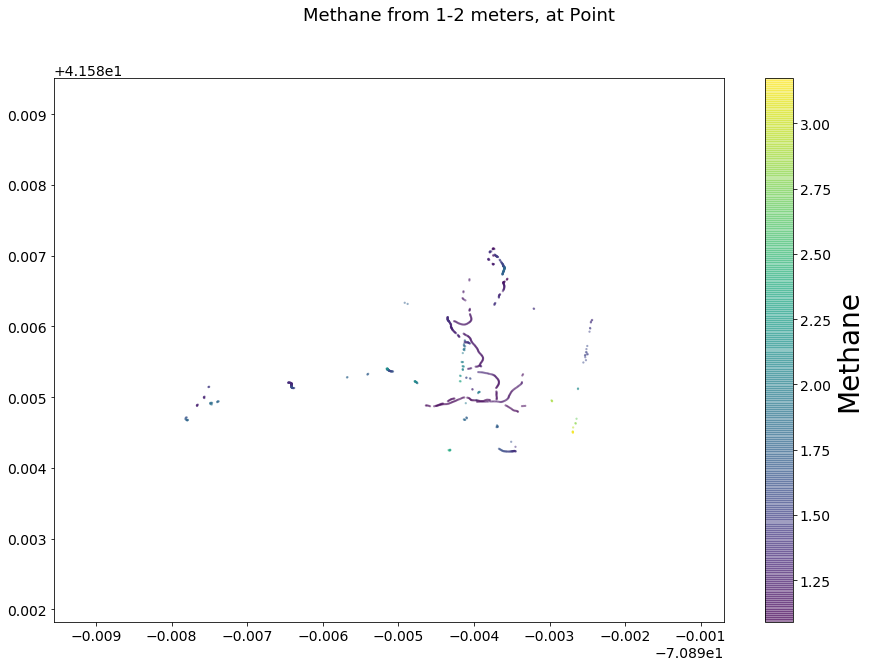

In [20]:
nb_2m = nb_df[(nb_df['ctd']['Depth']<2) & (nb_df['ctd']['Depth']>1)]

x = nb_2m['p']['Longitude']
y = nb_2m['p']['Latitude']
c = nb_2m['gga']['CH4_ppm_adjusted']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Methane')

map_c.suptitle('Methane from 1-2 meters, at Point', fontsize=18)
plt.show()

Let's look at the harbor...

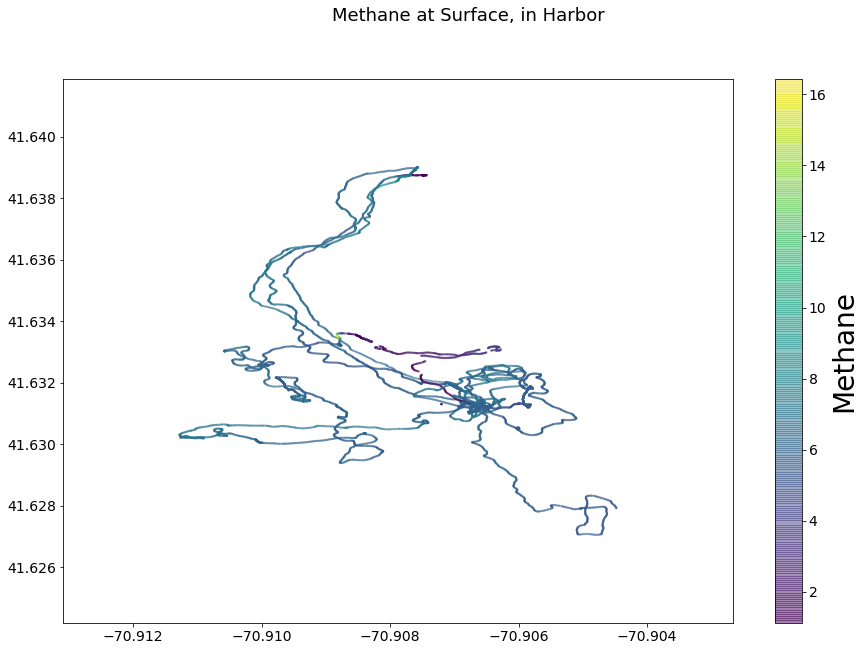

In [21]:
fh_1m = fh_df[fh_df['ctd']['Depth']<1]

x = fh_1m['p']['Longitude']
y = fh_1m['p']['Latitude']
c = fh_1m['gga']['CH4_ppm_adjusted']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Methane')

map_c.suptitle('Methane at Surface, in Harbor', fontsize=18)
plt.show()

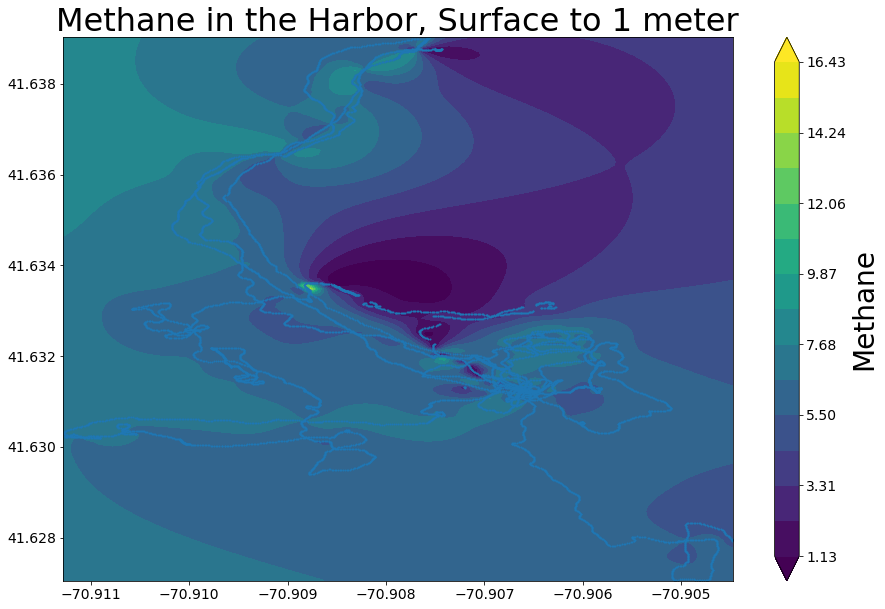

In [22]:
fh_1m = fh_1m[np.isfinite(fh_1m['gga']['CH4_ppm_adjusted'])]

x = fh_1m['p']['Longitude']
y = fh_1m['p']['Latitude']
c = fh_1m['gga']['CH4_ppm_adjusted']

x_min = min(fh_1m['p']['Longitude'])
x_max = max(fh_1m['p']['Longitude'])
y_min = min(fh_1m['p']['Latitude'])
y_max = max(fh_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=1, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('Methane')
plt.title('Methane in the Harbor, Surface to 1 meter')

plt.show()

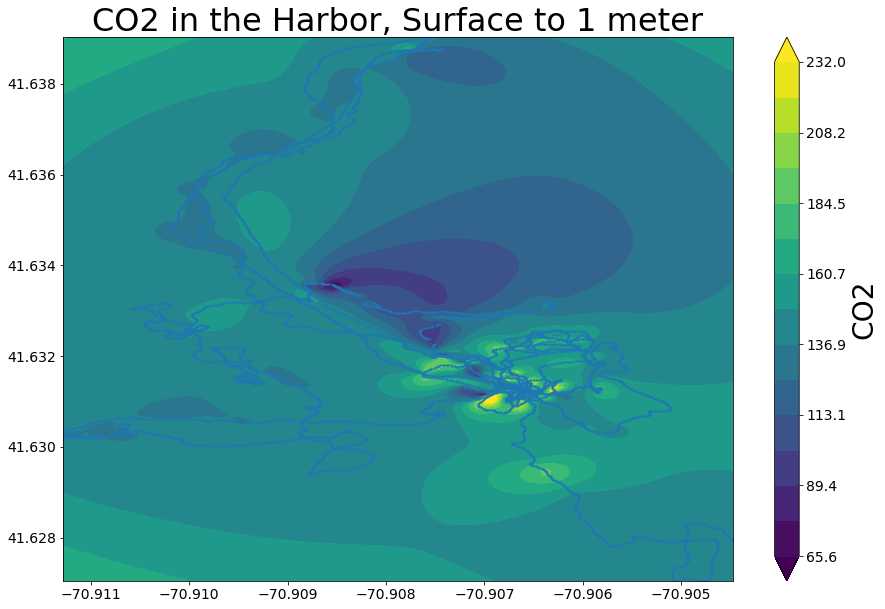

In [23]:
x = fh_1m['p']['Longitude']
y = fh_1m['p']['Latitude']
c = fh_1m['gga']['CO2_ppm_adjusted']

x_min = min(fh_1m['p']['Longitude'])
x_max = max(fh_1m['p']['Longitude'])
y_min = min(fh_1m['p']['Latitude'])
y_max = max(fh_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=1, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('CO2')
plt.title('CO2 in the Harbor, Surface to 1 meter')

plt.show()

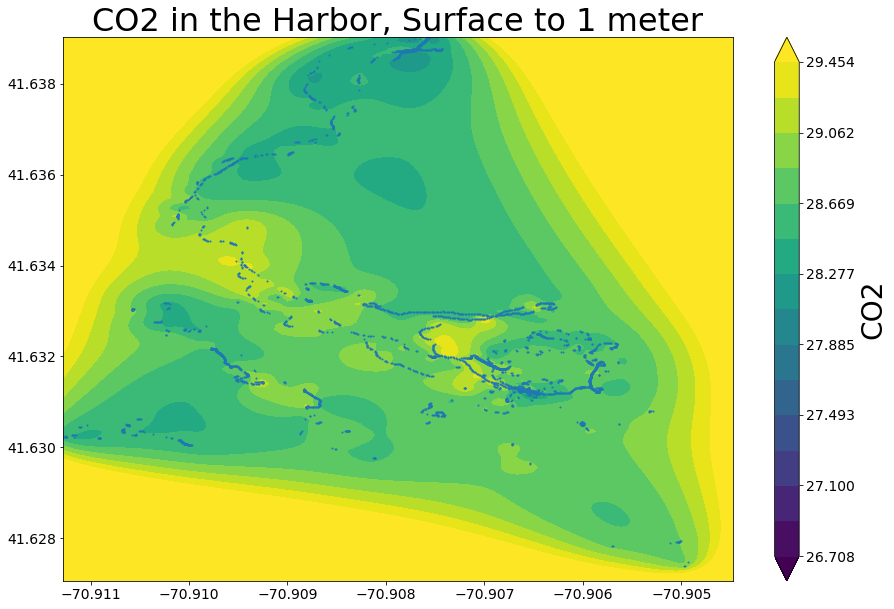

In [24]:
fh_2m = fh_df[(fh_df['ctd']['Depth']<1) & (fh_df['ctd']['Depth']>0.5)]

x = fh_2m['p']['Longitude']
y = fh_2m['p']['Latitude']
c = fh_2m['ctd']['Salinity']

# map_c = plt.figure(figsize=(15,10))
# ax = map_c.gca()
# cmap = plt.cm.viridis
# points = ax.scatter(x, y, c=c, s=5, alpha=0.5, lw=0, cmap=cmap)
# cbar = map_c.colorbar(points)
# cbar.set_label('CO2')

# map_c.suptitle('CO2 at Surface, in Harbor', fontsize=18)
# plt.show()

x_min = min(fh_1m['p']['Longitude'])
x_max = max(fh_1m['p']['Longitude'])
y_min = min(fh_1m['p']['Latitude'])
y_max = max(fh_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=0, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('CO2')
plt.title('CO2 in the Harbor, Surface to 1 meter')

plt.show()

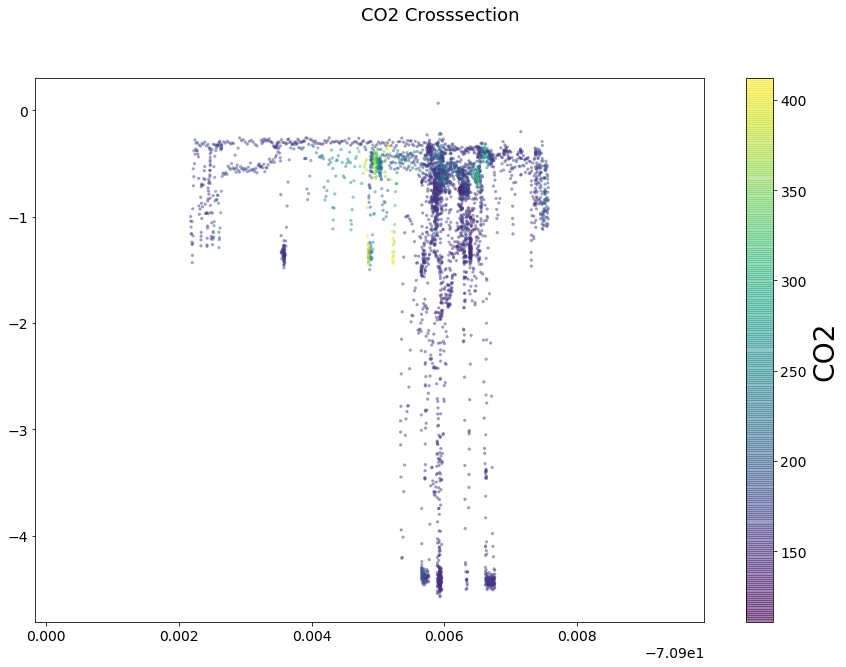

In [30]:
x = nb_df['p']['Longitude']
y = -nb_df['ctd']['Depth']
c = nb_df['gga']['CO2_ppm_adjusted']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('CO2')

map_c.suptitle('CO2 Crosssection', fontsize=18)
plt.show()

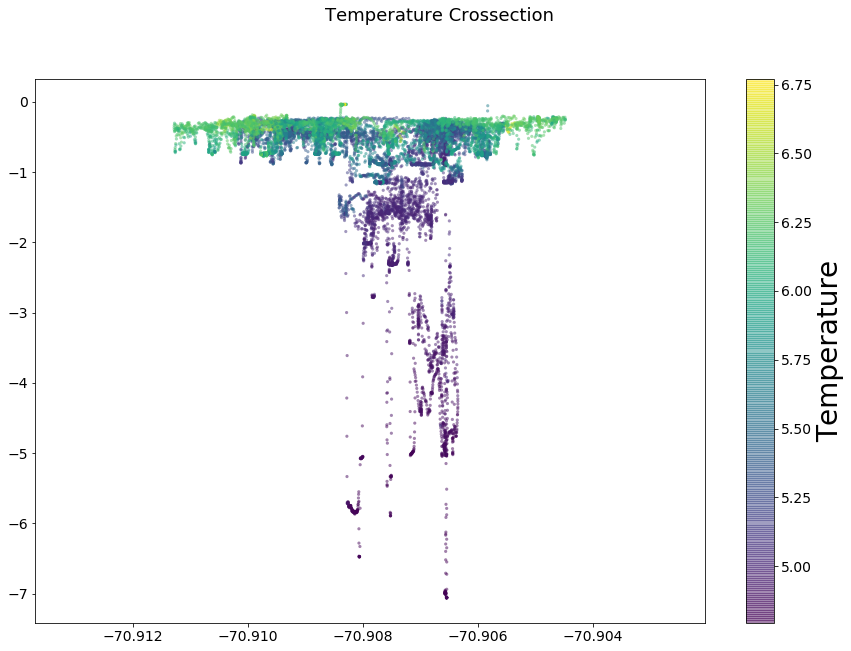

In [14]:
x = fh_df['p']['Longitude']
y = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Temperature']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Temperature')

map_c.suptitle('Temperature Crossection', fontsize=18)
plt.show()

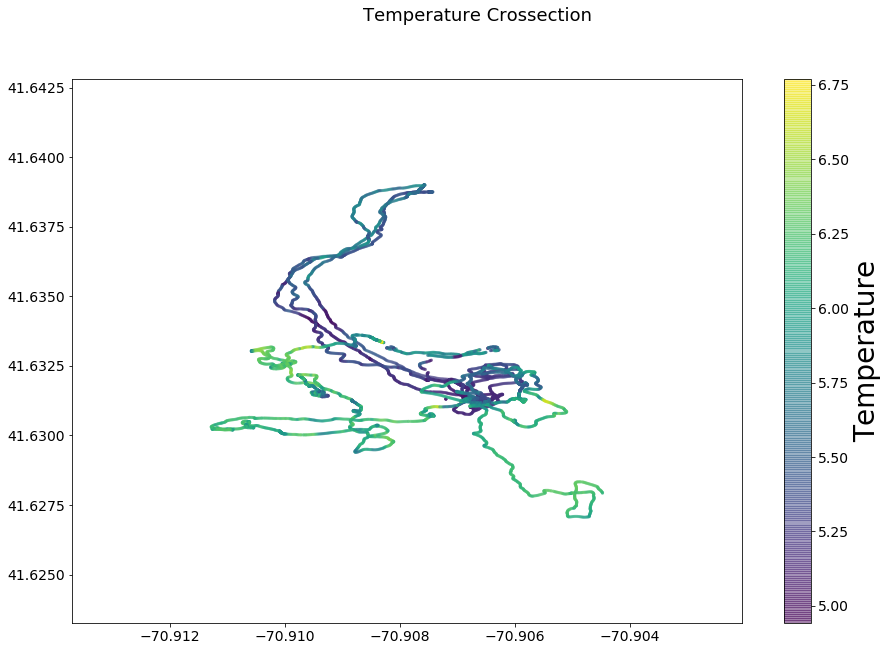

In [21]:
fh_1m = fh_df[(fh_df['ctd']['Depth']<1.0)]# & (fh_df['ctd']['Depth']<5.0)]

x = fh_1m['p']['Longitude']
y = fh_1m['p']['Latitude']#-fh_1m['ctd']['Depth']
c = fh_1m['ctd']['Temperature']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Temperature')

map_c.suptitle('Temperature Crossection', fontsize=18)
plt.show()

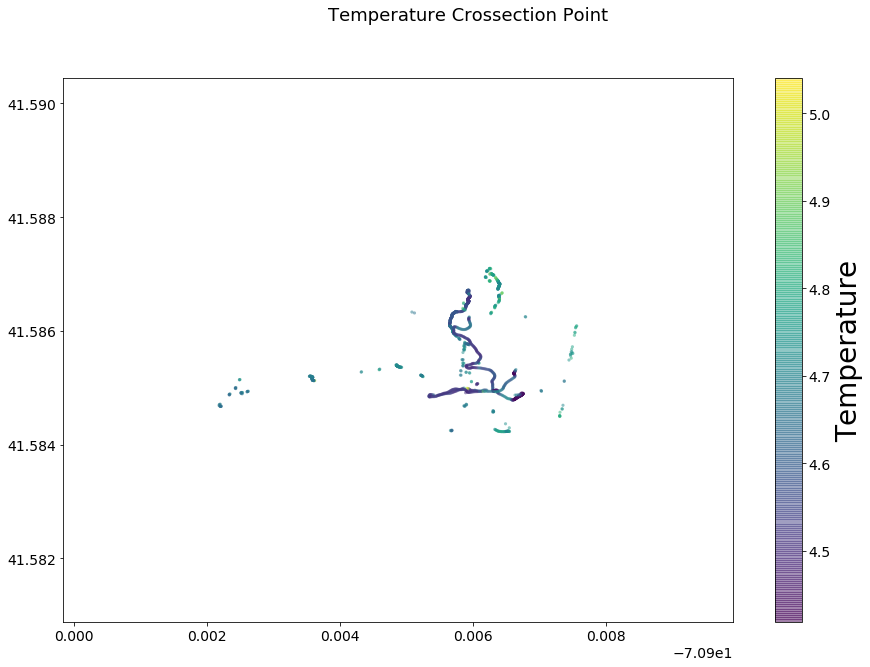

In [20]:
nb_1m = nb_df[(nb_df['ctd']['Depth']>1.0) & (nb_df['ctd']['Depth']<5.0)]

x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']#-fh_1m['ctd']['Depth']
c = nb_1m['ctd']['Temperature']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Temperature')

map_c.suptitle('Temperature Crossection Point', fontsize=18)
plt.show()

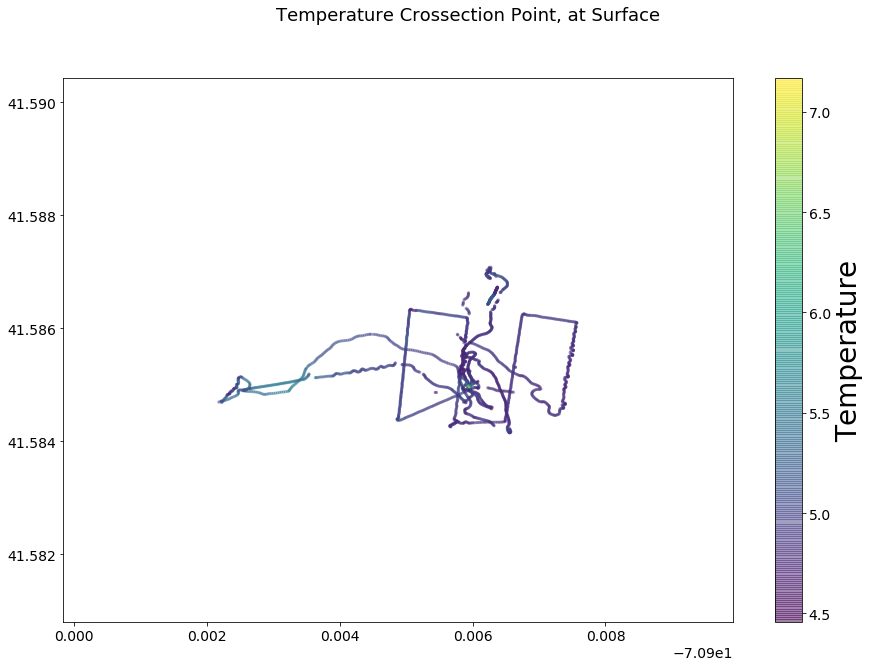

In [22]:
nb_1m = nb_df[(nb_df['ctd']['Depth']<1.0)]# & (nb_df['ctd']['Depth']<5.0)]

x = nb_1m['p']['Longitude']
y = nb_1m['p']['Latitude']#-fh_1m['ctd']['Depth']
c = nb_1m['ctd']['Temperature']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Temperature')

map_c.suptitle('Temperature Crossection Point, at Surface', fontsize=18)
plt.show()

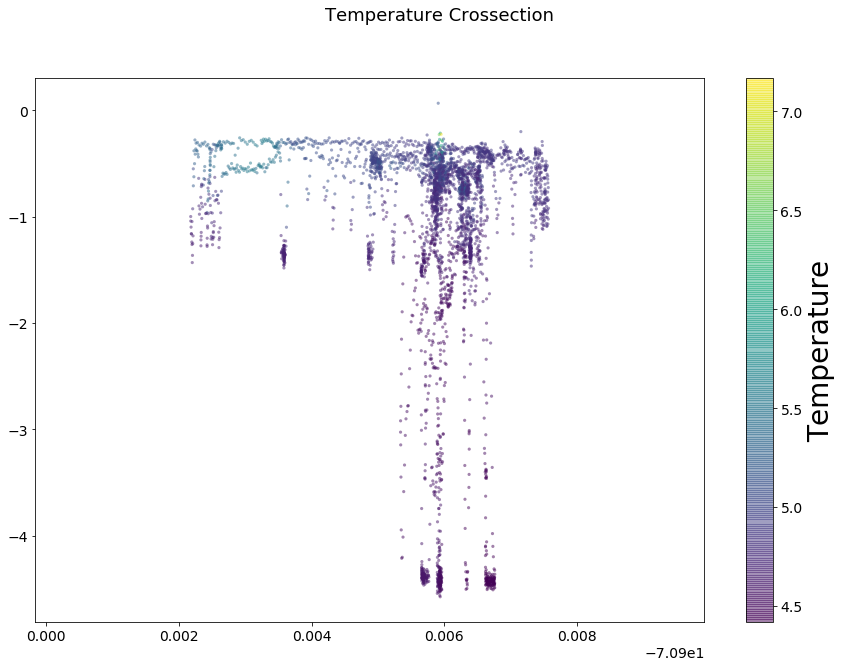

In [23]:
x = nb_df['p']['Longitude']
y = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Temperature']

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cmap = plt.cm.viridis
points = ax.scatter(x, y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap)
cbar = map_c.colorbar(points)
cbar.set_label('Temperature')

map_c.suptitle('Temperature Crossection', fontsize=18)
plt.show()

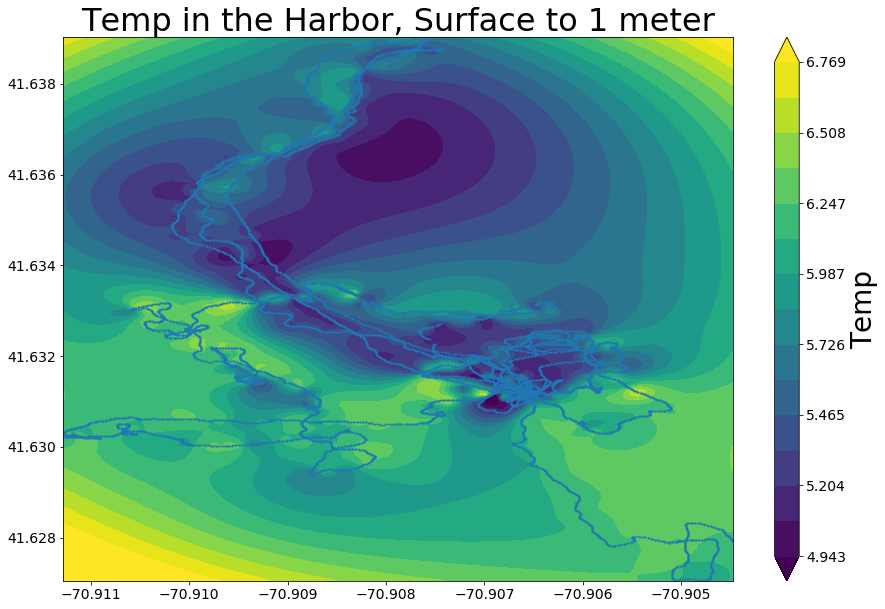

In [27]:
fh_1m = fh_1m[np.isfinite(fh_1m['ctd']['Temperature'])]

x = fh_1m['p']['Longitude']
y = fh_1m['p']['Latitude']
c = fh_1m['ctd']['Temperature']

x_min = min(fh_1m['p']['Longitude'])
x_max = max(fh_1m['p']['Longitude'])
y_min = min(fh_1m['p']['Latitude'])
y_max = max(fh_1m['p']['Latitude'])

xi = np.linspace(x_min, x_max, 150)
yi = np.linspace(y_min, y_max, 150)
xi, yi = np.meshgrid(xi,yi)

zfunction = Rbf(x, y, c, epsilon=10, function='linear')
zi = zfunction(xi, yi)

map_c = plt.figure(figsize=(15,10))
ax = map_c.gca()
cs = ax.contourf(xi,yi,zi, 
                 cmap=plt.cm.viridis, 
                 levels=np.linspace(min(c), max(c), 15), 
                 extend='both')
scat = ax.scatter(x, y, s=1)
cbar = map_c.colorbar(cs)
cbar.set_label('Temp')
plt.title('Temp in the Harbor, Surface to 1 meter')

plt.show()